In [1]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1578695377482_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/73/9b/52e228545d14f14bb2a1622e225f38463c8726645165e1cb7dde95bfe6d4/pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

In [2]:
sc.install_pypi_package("s3fs")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/72/5c/ec84c7ec49fde2c3b0d885ecae4504fa40fc77fef7684e9f2939c50f9b94/s3fs-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/b7/a8504dce343495e6da14745280746634c27b0618355d5d7082489cb10673/boto3-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/44/22/ea0756613d704e2cab650b8defe07a1964d3a31133c5c10dcc1803b58b52/botocore-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dd/1f/7028dacd3c28f34ce48130aae73a88fa5cc27b6b0e494fcf2739f7954d9d/fsspec-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d5/29/2a79d0223617d255eccac5fd9c147d65ee32f9aabe0e47ab75fd7568af24/s3transfer-0.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/22/cd/a6aa959dca619918ccb55023b4cb151949c64d4d5d55b3f4ffd7eee0c6e8/docutils-0.15.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b4/40/a983729

In [3]:
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl

In [4]:
S3_SAVE_PATH = "s3://aws-emr-resources-030826614416-us-east-2/notebooks/"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
import pyspark
from pyspark.sql import SparkSession, Window

from pyspark.sql.functions import udf, desc, isnan, when, count, col, lit
from pyspark.sql.functions import max as Fmax
from pyspark.sql.types import IntegerType, FloatType

import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta
import re

import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
spark = SparkSession.builder.appName("sparkify").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
event_data = "s3n://udacity-dsnd/sparkify/mini_sparkify_event_data.json"
#event_data = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
df = spark.read.json(event_data)
# df.write.format('json').save('s3://aws-emr-resources-030826614416-us-east-1/notebooks/sparkify.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1. Univariate Data Exploration

In [8]:
print('The dataset has', df.count(), 'records, and', len(df.columns), 'features.')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The dataset has 286500 records, and 18 features.

In [9]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)

In [ ]:
numerical_features = ['itemInSession', 'length', 'registration','ts']
id_features = ['sessionId','userId']
categorical_features = ['artist','auth','gender','status'
                        'level','location','method','page','song','userAgent']
to_drop_features = ['last_name','first_name']

In [ ]:
# numerical features

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

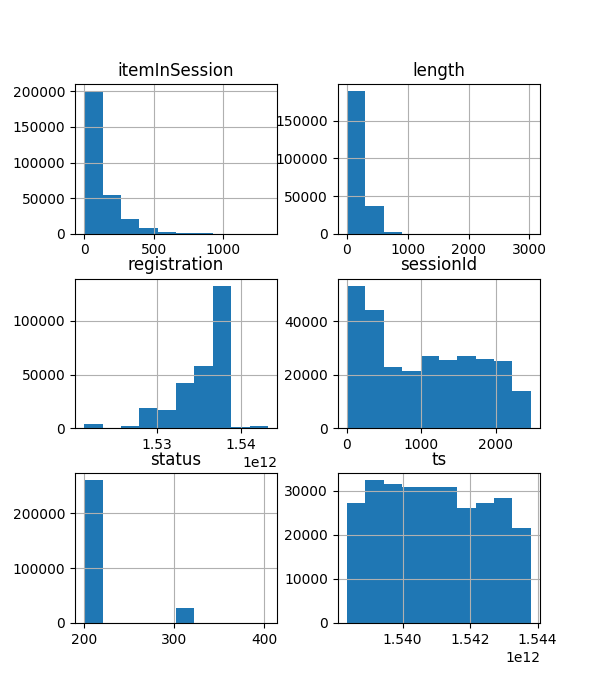

In [18]:
df.toPandas().hist(figsize=(6,7))
%matplot plt

In [27]:
# from pyspark.mllib.stat import Statistics

# col_names = df.columns
# features = df.rdd.map(lambda row: row[0:])
# corr_mat=Statistics.corr(features, method="pearson")
# corr_df = pd.DataFrame(corr_mat)
# corr_df.index, corr_df.columns = col_names, col_names

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
def show_feature_stats(df, col_name):
    return df.describe(col_name).show()

def distinct_values(df, col_name):
    count = df.select([col_name]).distinct().count()
    print('Number of unique values: ', count)

def value_counts(df, col_name):
    df.groupby([col_name]).agg({col_name: 'count'}).withColumnRenamed("count({})".format(col_name), "count").sort(desc("count")).show(10)

def count_missing_values(df, col_name):
    df.select([count(when(isnan(col_name) | col(col_name).isNull(), col_name)).alias(col_name)]).show()

def get_other_col_value_counts_when_col_is_null(df, null_col_name, other_col):
    return value_counts(df.filter(isnan(null_col_name) | col(null_col_name).isNull()), other_col)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
sns.countplot(x = "gender", hue = "churn", data = df_gender)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'sns' is not defined
Traceback (most recent call last):
NameError: name 'sns' is not defined



### 1) Categorical Feature

In [46]:
for col in df.columns:
    print(col)
    distinct_values(df, col)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

artist
Number of unique values:  17656
auth
Number of unique values:  4
firstName
Number of unique values:  190
gender
Number of unique values:  3
itemInSession
Number of unique values:  1322
lastName
Number of unique values:  174
length
Number of unique values:  14866
level
Number of unique values:  2
location
Number of unique values:  115
method
Number of unique values:  2
page
Number of unique values:  22
registration
Number of unique values:  226
sessionId
Number of unique values:  2354
song
Number of unique values:  58481
status
Number of unique values:  3
ts
Number of unique values:  277447
userAgent
Number of unique values:  57
userId
Number of unique values:  226

In [43]:
for col in categorical_features:
    value_counts(df, col)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|       Kings Of Leon| 1841|
|            Coldplay| 1813|
|Florence + The Ma...| 1236|
|       Dwight Yoakam| 1135|
|            BjÃÂ¶rk| 1133|
|      The Black Keys| 1125|
|                Muse| 1090|
|       Justin Bieber| 1044|
|        Jack Johnson| 1007|
|              Eminem|  953|
+--------------------+-----+
only showing top 10 rows

+----------+------+
|      auth| count|
+----------+------+
| Logged In|278102|
|Logged Out|  8249|
|     Guest|    97|
| Cancelled|    52|
+----------+------+

+------+------+
|gender| count|
+------+------+
|     F|154578|
|     M|123576|
|  null|     0|
+------+------+

+-----+------+
|level| count|
+-----+------+
| paid|228162|
| free| 58338|
+-----+------+

+--------------------+-----+
|            location|count|
+--------------------+-----+
|Los Angeles-Long ...|30131|
|New York-Newark-J...|23684|
|Boston-Cambridge-...|13873|
|Houston-The Woodl...| 9499|


In [44]:
# Id features
for col in id_features:
    print(col)
    distinct_values(df, col)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

sessionId
Number of unique values:  2354
userId
Number of unique values:  226

## 2. Feature Engineering

- Transform as binary 0/1 the level of subscription (paid or not)
- Dummify the gender (binary 0/1 as well)
- Registration time for the user
- Engagement of the user with the number of artists, songs or even the total length of music listened, add to playlist number
- Social interactions with likes/dislikes, friends, etc
- Upgrade/downgrade the subscription level
- User operating system which could help us to identify users of a version that does not give entire satisfaction
- Errors_encountered which could help us to identify users who had several issues and then maybe quit

### 2.1 Keep only the useful columns

In [ ]:
df_filtered = df_users_with_churn_full.select(['artist', 'gender', 'length', 'level', 'page', 'location', 'method', 'page',
                                               'registration', 'sessionId', 'song', 'status', 'ts',
                                               'userAgent', 'userId', 'churn'])
print("Filtered dataframe has shape ({}, {})".format(df_filtered.count(), len(df_filtered.columns)))

| Column Name | Type | Definition | Strategy 
| --- | --- | --- | --- | 
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep
| Artist | Gaussian | .843 | Keep


In [51]:
df_clean_users = df.filter((~(isnan(df['userId']))) & (df['userId'].isNotNull()) & (df['userId'] != ""))
print("Cleaned pyspark dataframe shape ({}, {})".format(df_clean_users.count(), len(df_clean_users.columns)))

# Define the UDF
user_churned = udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, IntegerType())

# Apply this function on a specific column of the whole dataset
df_with_churn = df_clean_users.withColumn("churn", user_churned("page"))
df_with_churn_full = df_with_churn.withColumn("churn", Fmax('churn').over(Window.partitionBy("userId")))

# Check that we are still have 52 churn users
df_with_churn_full.filter(df_with_churn_full['churn'] == 1).select('userId').dropDuplicates().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Cleaned pyspark dataframe shape (278154, 18)
52

In [54]:
df_full = df_with_churn_full

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
number_of_sessions = spark.sql("SELECT userId, avg(count) as average from (SELECT userId, count(*) as count FROM sparkify_table group by sessionId, userId) group by userId")
pd_num_sessions = number_of_sessions.toPandas()
pd_num_sessions['churn'] = df_full['churn']
sns.boxplot(x= "churn", y="average", data = pd_num_sessions);

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'Table or view not found: sparkify_table; line 1 pos 81'
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/sql/session.py", line 767, in sql
    return DataFrame(self._jsparkSession.sql(sqlQuery), self._wrapped)
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/sql/utils.py", line 69, in deco
    raise AnalysisException(s.split(': ', 1)[1], stackTrace)
pyspark.sql.utils.AnalysisException: 'Table or view not found: sparkify_table; line 1 pos 81'

